# Heart Attack Prediction using Decision Tree Classifier

## 📋 Project Description

This notebook demonstrates the development of a machine learning model to predict the likelihood of heart attack occurrences based on various health, lifestyle, and clinical features. It includes data preprocessing, handling class imbalance, multiple training experiments, hyperparameter tuning using GridSearchCV, and final model evaluation.

## Data Preprocessing

### Description:
Load the dataset, check for null values, encode categorical variables if any, and prepare the data for modeling. This includes separating features and the target variable.

In [92]:
import pandas as pd

# Load dataset
df = pd.read_csv('heart_attack_prediction_indonesia.csv') 

In [93]:
# Inspect dataset
df.head()

,age,gender,region,income_level,hypertension,diabetes,cholesterol_level,obesity,waist_circumference,family_history,...,blood_pressure_diastolic,fasting_blood_sugar,cholesterol_hdl,cholesterol_ldl,triglycerides,EKG_results,previous_heart_disease,medication_usage,participated_in_free_screening,heart_attack
0,60,Male,Rural,Middle,0,1,211,0,83,0,...,62,173,48,121,101,Normal,0,0,0,0
1,53,Female,Urban,Low,0,0,208,0,106,1,...,76,70,58,83,138,Normal,1,0,1,0
2,62,Female,Urban,Low,0,0,231,1,112,1,...,74,118,69,130,171,Abnormal,0,1,0,1
3,73,Male,Urban,Low,1,0,202,0,82,1,...,65,98,52,85,146,Normal,0,1,1,0
4,52,Male,Urban,Middle,1,0,232,0,89,0,...,75,104,59,127,139,Normal,1,0,1,1


In [96]:
#check data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158355 entries, 0 to 158354
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   age                             158355 non-null  int64  
 1   gender                          158355 non-null  object 
 2   region                          158355 non-null  object 
 3   income_level                    158355 non-null  object 
 4   hypertension                    158355 non-null  int64  
 5   diabetes                        158355 non-null  int64  
 6   cholesterol_level               158355 non-null  int64  
 7   obesity                         158355 non-null  int64  
 8   waist_circumference             158355 non-null  int64  
 9   family_history                  158355 non-null  int64  
 10  smoking_status                  158355 non-null  object 
 11  alcohol_consumption             63507 non-null   object 
 12  physical_activit

In [98]:
#Check all columns

df.columns

Index(['age', 'gender', 'region', 'income_level', 'hypertension', 'diabetes',
       'cholesterol_level', 'obesity', 'waist_circumference', 'family_history',
       'smoking_status', 'alcohol_consumption', 'physical_activity',
       'dietary_habits', 'air_pollution_exposure', 'stress_level',
       'sleep_hours', 'blood_pressure_systolic', 'blood_pressure_diastolic',
       'fasting_blood_sugar', 'cholesterol_hdl', 'cholesterol_ldl',
       'triglycerides', 'EKG_results', 'previous_heart_disease',
       'medication_usage', 'participated_in_free_screening', 'heart_attack'],
      dtype='object')

In [100]:
# Check missing values
print(df.isnull().sum())

age                                   0
gender                                0
region                                0
income_level                          0
hypertension                          0
diabetes                              0
cholesterol_level                     0
obesity                               0
waist_circumference                   0
family_history                        0
smoking_status                        0
alcohol_consumption               94848
physical_activity                     0
dietary_habits                        0
air_pollution_exposure                0
stress_level                          0
sleep_hours                           0
blood_pressure_systolic               0
blood_pressure_diastolic              0
fasting_blood_sugar                   0
cholesterol_hdl                       0
cholesterol_ldl                       0
triglycerides                         0
EKG_results                           0
previous_heart_disease                0


In [102]:
# Convert None values into Non-Alcholic 
df['alcohol_consumption'] = df['alcohol_consumption'].fillna('Non-Alcoholic')

In [104]:
# Checking correctly replace the Non-Alcholic
print(df['alcohol_consumption'])

0         Non-Alcoholic
1         Non-Alcoholic
2              Moderate
3              Moderate
4              Moderate
              ...      
158350    Non-Alcoholic
158351    Non-Alcoholic
158352         Moderate
158353    Non-Alcoholic
158354    Non-Alcoholic
Name: alcohol_consumption, Length: 158355, dtype: object


In [106]:
# Summary statistics for numerical columns
df.describe()

,age,hypertension,diabetes,cholesterol_level,obesity,waist_circumference,family_history,sleep_hours,blood_pressure_systolic,blood_pressure_diastolic,fasting_blood_sugar,cholesterol_hdl,cholesterol_ldl,triglycerides,previous_heart_disease,medication_usage,participated_in_free_screening,heart_attack
count,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000
mean,54.543778,0.299069,0.199804,199.533264,0.249901,93.268504,0.300218,6.480064,129.515772,79.490809,110.736762,49.491478,129.569916,149.715885,0.200575,0.499770,0.601029,0.401004
std,11.910897,0.457851,0.399854,39.737565,0.432957,16.382205,0.458354,1.425398,15.005641,10.002964,27.673445,9.982634,34.913318,49.023473,0.400432,0.500002,0.489688,0.490103
min,25.000000,0.000000,0.000000,100.000000,0.000000,20.000000,0.000000,3.000000,61.000000,37.000000,70.000000,8.000000,-19.000000,50.000000,0.000000,0.000000,0.000000,0.000000
25%,46.000000,0.000000,0.000000,172.000000,0.000000,82.000000,0.000000,5.492985,119.000000,73.000000,89.000000,43.000000,106.000000,116.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,0.000000,0.000000,199.000000,0.000000,93.000000,0.000000,6.507461,130.000000,80.000000,109.000000,49.000000,130.000000,149.000000,0.000000,0.000000,1.000000,0.000000
75%,63.000000,1.000000,0.000000,226.000000,0.000000,104.000000,1.000000,7.520640,140.000000,86.000000,130.000000,56.000000,153.000000,183.000000,0.000000,1.000000,1.000000,1.000000
max,90.000000,1.000000,1.000000,350.000000,1.000000,173.000000,1.000000,9.000000,199.000000,127.000000,230.000000,93.000000,282.000000,380.000000,1.000000,1.000000,1.000000,1.000000


In [108]:
# Check for duplicates
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 0


In [110]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

#Label Encoding for ordered categories
label_cols = [
    'income_level',
    'smoking_status',
    'physical_activity',
    'air_pollution_exposure',
    'stress_level'
]

le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])

In [112]:
#One-Hot Encoding for nominal categories
one_hot_cols = ['gender', 'region', 'dietary_habits', 'EKG_results']
df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)


In [114]:
#Manual Encoding the alcohol_consumption
alcohol_mapping = {'Non-Alcoholic': 0, 'Moderate': 1, 'High': 2}
df['alcohol_consumption'] = df['alcohol_consumption'].map(alcohol_mapping)


In [116]:
#het first 5 raws to check encoding is correctly applied
df.head()

,age,income_level,hypertension,diabetes,cholesterol_level,obesity,waist_circumference,family_history,smoking_status,alcohol_consumption,...,cholesterol_ldl,triglycerides,previous_heart_disease,medication_usage,participated_in_free_screening,heart_attack,gender_Male,region_Urban,dietary_habits_Unhealthy,EKG_results_Normal
0,60,2,0,1,211,0,83,0,1,0,...,121,101,0,0,0,0,True,False,True,True
1,53,1,0,0,208,0,106,1,2,0,...,83,138,1,0,1,0,False,True,False,True
2,62,1,0,0,231,1,112,1,2,1,...,130,171,0,1,0,1,False,True,False,False
3,73,1,1,0,202,0,82,1,1,1,...,85,146,0,1,1,0,True,True,True,True
4,52,2,1,0,232,0,89,0,0,1,...,127,139,1,0,1,1,True,True,True,True


In [118]:
#het first 5 raws to check encoding is correctly applied
df.head()

,age,income_level,hypertension,diabetes,cholesterol_level,obesity,waist_circumference,family_history,smoking_status,alcohol_consumption,...,cholesterol_ldl,triglycerides,previous_heart_disease,medication_usage,participated_in_free_screening,heart_attack,gender_Male,region_Urban,dietary_habits_Unhealthy,EKG_results_Normal
0,60,2,0,1,211,0,83,0,1,0,...,121,101,0,0,0,0,True,False,True,True
1,53,1,0,0,208,0,106,1,2,0,...,83,138,1,0,1,0,False,True,False,True
2,62,1,0,0,231,1,112,1,2,1,...,130,171,0,1,0,1,False,True,False,False
3,73,1,1,0,202,0,82,1,1,1,...,85,146,0,1,1,0,True,True,True,True
4,52,2,1,0,232,0,89,0,0,1,...,127,139,1,0,1,1,True,True,True,True


In [120]:
# Check class distribution
print(df['heart_attack'].value_counts())

heart_attack
0    94854
1    63501
Name: count, dtype: int64


In [122]:
#Split the Testing and Training set

from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop(columns=['heart_attack'])
y = df['heart_attack']

# Split: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Check shapes
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (126684, 27)
Testing set size: (31671, 27)


# Train the Model

## Experiment 1 – Baseline Decision Tree Model (Imbalanced Data)

In [126]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib


# Initialize and train Decision Tree model
model = DecisionTreeClassifier(
    max_depth=8,
    min_samples_split=18,
    min_samples_leaf=5,
    class_weight='balanced',
    random_state=42
)
model.fit(X_train, y_train)

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.7240
Testing Accuracy: 0.7191


In [132]:
# Classification Report
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred))



Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.81      0.69      0.75     18971
           1       0.62      0.76      0.68     12700

    accuracy                           0.72     31671
   macro avg       0.72      0.73      0.72     31671
weighted avg       0.74      0.72      0.72     31671



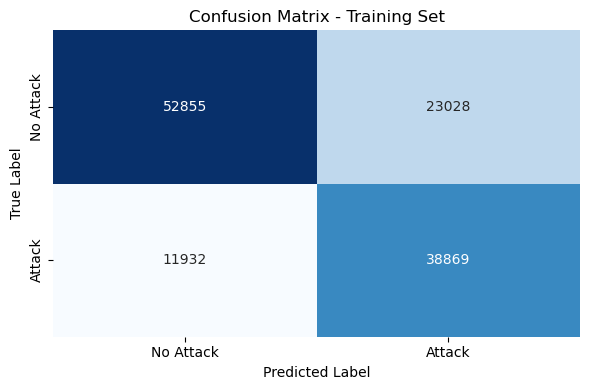

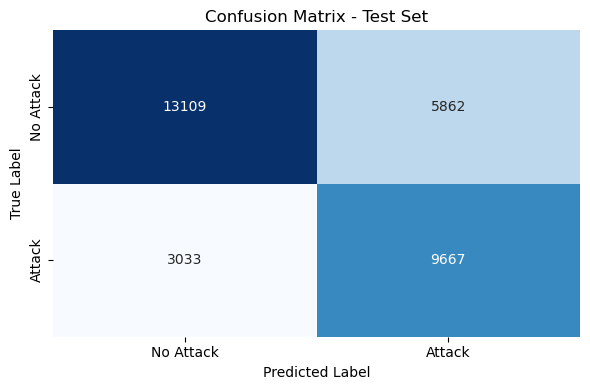

In [136]:
# Confusion Matrices
train_cm = confusion_matrix(y_train, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

#Confusion Matrix Heatmaps
def plot_conf_matrix(cm, title):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['No Attack', 'Attack'],
                yticklabels=['No Attack', 'Attack'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)
    plt.tight_layout()
    plt.show()

plot_conf_matrix(train_cm, "Confusion Matrix - Training Set")
plot_conf_matrix(test_cm, "Confusion Matrix - Test Set")

In [138]:
# Feature importance
importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(importances)


Feature Importance:
                           Feature  Importance
2                     hypertension    0.241743
20          previous_heart_disease    0.233076
3                         diabetes    0.129436
5                          obesity    0.103161
8                   smoking_status    0.101682
4                cholesterol_level    0.071854
0                              age    0.071640
16             fasting_blood_sugar    0.043740
18                 cholesterol_ldl    0.000700
19                   triglycerides    0.000543
14         blood_pressure_systolic    0.000514
17                 cholesterol_hdl    0.000412
15        blood_pressure_diastolic    0.000363
13                     sleep_hours    0.000350
6              waist_circumference    0.000263
9              alcohol_consumption    0.000234
23                     gender_Male    0.000217
7                   family_history    0.000029
21                medication_usage    0.000020
12                    stress_level    0

## Experiment 2 – SMOTE Oversampling

In [147]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import joblib
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Apply SMOTE on training data only (NOT on test data)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

#  Train model on SMOTE data
model = DecisionTreeClassifier(
    max_depth=8,
    min_samples_split=18,
    min_samples_leaf=5,
    class_weight='balanced',
    random_state=42
)

model.fit(X_train_smote, y_train_smote)

#  Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

#  Accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")


Training Accuracy: 0.7136
Testing Accuracy: 0.7080


In [151]:
# Classification Report
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred))


Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.79      0.70      0.74     18971
           1       0.62      0.72      0.66     12700

    accuracy                           0.71     31671
   macro avg       0.70      0.71      0.70     31671
weighted avg       0.72      0.71      0.71     31671



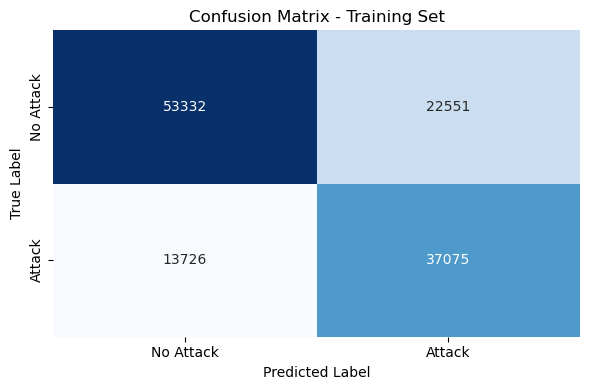

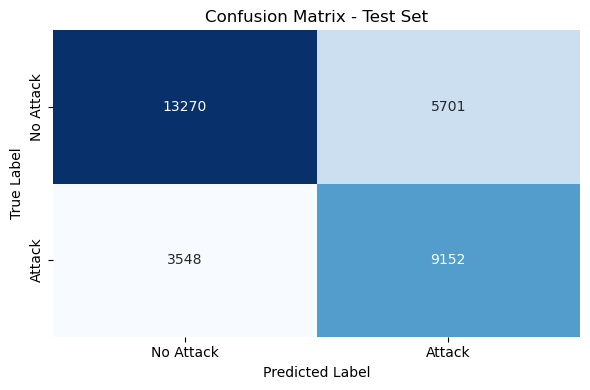

In [149]:
# Confusion Matrices
train_cm = confusion_matrix(y_train, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

#Confusion Matrix Heatmaps
def plot_conf_matrix(cm, title):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['No Attack', 'Attack'],
                yticklabels=['No Attack', 'Attack'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)
    plt.tight_layout()
    plt.show()

plot_conf_matrix(train_cm, "Confusion Matrix - Training Set")
plot_conf_matrix(test_cm, "Confusion Matrix - Test Set")

In [153]:
#Feature importance
importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(importances)


Feature Importance:
                           Feature  Importance
8                   smoking_status    0.215013
20          previous_heart_disease    0.180540
2                     hypertension    0.175291
4                cholesterol_level    0.089376
0                              age    0.078531
3                         diabetes    0.071315
5                          obesity    0.058350
16             fasting_blood_sugar    0.040790
10               physical_activity    0.019590
24                    region_Urban    0.013797
7                   family_history    0.011419
1                     income_level    0.008950
23                     gender_Male    0.007992
11          air_pollution_exposure    0.007438
25        dietary_habits_Unhealthy    0.004826
12                    stress_level    0.004527
22  participated_in_free_screening    0.003740
26              EKG_results_Normal    0.002236
6              waist_circumference    0.001321
21                medication_usage    0

### Downsampling the data

In [162]:
from sklearn.utils import resample

# Combine for downsampling (training only)
train_data = pd.concat([X_train, y_train], axis=1)

# Separate majority and minority classes
majority = train_data[train_data['heart_attack'] == 0]
minority = train_data[train_data['heart_attack'] == 1]

# Downsample majority class
majority_downsampled = resample(
    majority,
    replace=False,
    n_samples=len(minority),
    random_state=42
)

# Combine and shuffle
train_downsampled = pd.concat([majority_downsampled, minority]).sample(frac=1, random_state=42)

# Separate features and target again
X_train_balanced = train_downsampled.drop(columns=['heart_attack'])
y_train_balanced = train_downsampled['heart_attack']

print(train_downsampled['heart_attack'].value_counts())

heart_attack
0    50801
1    50801
Name: count, dtype: int64


## Experiment 3 – Training with Downsampled Data

In [177]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    roc_curve,
    roc_auc_score
)
import matplotlib.pyplot as plt
import seaborn as sns


# Train model on original training data (no SMOTE)
model = DecisionTreeClassifier(
    max_depth=8,
    min_samples_split=10,
    min_samples_leaf=5,
    class_weight='balanced',
    random_state=42
)

model.fit(X_train_balanced, y_train_balanced)

#  Predict
y_train_pred = model.predict(X_train_balanced)
y_test_pred = model.predict(X_test)


# Accuracy
train_acc = accuracy_score(y_train_balanced, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy: {test_acc:.4f}")



Training Accuracy: 0.7314
Testing Accuracy: 0.7206


In [179]:
# Classification Report
print("\nClassification Report (Test Set):\n", classification_report(y_test, y_test_pred))


Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.81      0.70      0.75     18971
           1       0.63      0.75      0.68     12700

    accuracy                           0.72     31671
   macro avg       0.72      0.73      0.72     31671
weighted avg       0.73      0.72      0.72     31671




Confusion Matrix:
 [[13332  5639]
 [ 3210  9490]]


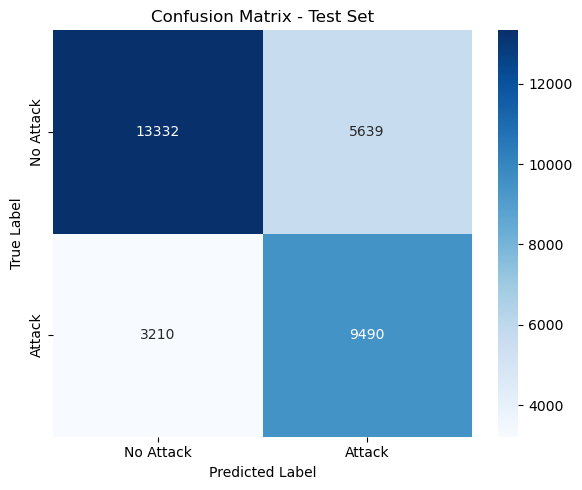

In [183]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix:\n", conf_matrix)
# Plot Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attack', 'Attack'], yticklabels=['No Attack', 'Attack'])
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

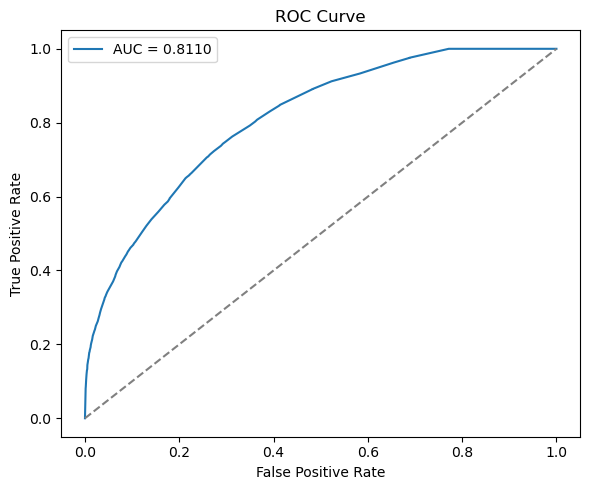

In [185]:
# ROC Curve
y_test_prob = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
roc_auc = roc_auc_score(y_test, y_test_prob)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.4f}')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.tight_layout()
plt.show()


In [187]:
# Feature importance
importances = pd.DataFrame({
    'Feature': X_train_balanced.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:\n", importances)


Feature Importance:
                            Feature  Importance
20          previous_heart_disease    0.240494
2                     hypertension    0.233250
3                         diabetes    0.128820
8                   smoking_status    0.101496
5                          obesity    0.100948
4                cholesterol_level    0.073102
0                              age    0.071477
16             fasting_blood_sugar    0.044264
13                     sleep_hours    0.001328
17                 cholesterol_hdl    0.000837
6              waist_circumference    0.000796
23                     gender_Male    0.000563
18                 cholesterol_ldl    0.000557
19                   triglycerides    0.000553
14         blood_pressure_systolic    0.000540
15        blood_pressure_diastolic    0.000472
21                medication_usage    0.000191
9              alcohol_consumption    0.000172
24                    region_Urban    0.000084
26              EKG_results_Normal    

## Experiment 4 – Hyperparameter Tuning with GridSearchCV

In [191]:
from sklearn.model_selection import GridSearchCV

# Define the model
model = DecisionTreeClassifier(class_weight='balanced', random_state=42)

# Define the hyperparameters grid
param_grid = {
    'max_depth': [5, 6, 7, 8, 9, 10, 15, 20],
    'min_samples_split': [5, 10, 12, 15, 20],
    'min_samples_leaf': [5, 6, 7, 8, 10]
}

# Apply GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train_balanced, y_train_balanced)

# Get best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train the model with the best parameters
best_model = grid_search.best_estimator_

# Accuracy
train_acc = accuracy_score( y_train_balanced, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy: {test_acc:.4f}")


Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Best Parameters: {'max_depth': 8, 'min_samples_leaf': 10, 'min_samples_split': 5}
Training Accuracy: 0.7314
Testing Accuracy: 0.7206


In [193]:
# Predict and evaluate
y_pred = best_model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Feature importance
importances = pd.DataFrame({
    'Feature': X_train_balanced.columns,
    'Importance': best_model.feature_importances_
}).sort_values(by='Importance', ascending=False)
print("Feature Importance:\n", importances)


Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.70      0.75     18971
           1       0.63      0.75      0.68     12700

    accuracy                           0.72     31671
   macro avg       0.72      0.73      0.72     31671
weighted avg       0.73      0.72      0.72     31671

Confusion Matrix:
 [[13328  5643]
 [ 3196  9504]]
Feature Importance:
                            Feature  Importance
20          previous_heart_disease    0.240764
2                     hypertension    0.233511
3                         diabetes    0.128964
8                   smoking_status    0.101610
5                          obesity    0.101061
4                cholesterol_level    0.072916
0                              age    0.071205
16             fasting_blood_sugar    0.044208
13                     sleep_hours    0.001442
6              waist_circumference    0.000861
18                 cholesterol_ldl    0.000704
23            